In [28]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [29]:
df= tf.keras.preprocessing.image_dataset_from_directory(
"PlantVillage", shuffle= True, image_size=(256, 256),
    batch_size=32
 )

Found 2152 files belonging to 3 classes.


In [30]:
class_names=df.class_names

In [31]:
len(df)

68

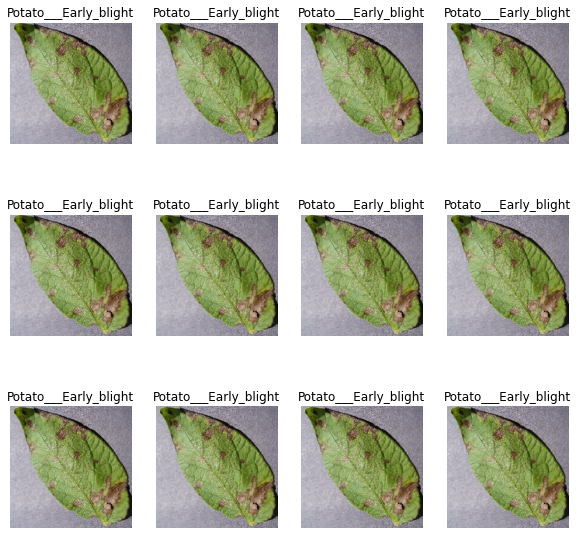

In [32]:
plt.figure(figsize=(10,10))
for image_batch , label_batch in df.take(1):
    for i in range(12)  :
        
        ax= plt.subplot(3,4,i+1)
        plt.imshow(image_batch[0].numpy().astype('uint8'))
        plt.title(class_names[label_batch[0]])
        plt.axis('off')

In [34]:
train_size=0.8

trainds=df.take(54)

In [35]:
testds =df.skip(54)

In [36]:
 valds=testds.take(6)

In [37]:
testds= testds.skip(6)

In [41]:
def get_dataset_partition(ds, train_split= 0.8, val_split=0.1, test_split= 0.1,shuffle=True,shuffle_size= 10000 ):
    ds_size= len(ds)
    
    if shuffle:
        ds= ds.shuffle(shuffle_size, seed=12)
        
    train_size= int(train_split* ds_size )
    val_size= int(val_split* ds_size )
    
    trainds=ds.take(train_size)
    
    valds= ds.skip(train_size).take(val_size)
    testds= ds.skip(train_size).skip(val_size)
    
    return trainds,valds,testds

In [42]:
 trainds,valds,testds=get_dataset_partition(df)

In [44]:
trainds.cache().shuffle(1000).prefetch(buffer_size= tf.data.AUTOTUNE )
valds.cache().shuffle(1000).prefetch(buffer_size= tf.data.AUTOTUNE )
testds.cache().shuffle(1000).prefetch(buffer_size= tf.data.AUTOTUNE )

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [45]:
resize_and_rescale= tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing (256,256),
    layers.experimental.preprocessing.Rescaling (1.0/255)
    
])

In [46]:
data_augument= tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    layers.experimental.preprocessing.RandomRotation(0.2)
])